# Podstawy uczenia maszynowego w Pythonie

In [3]:
from IPython.display import Image
%matplotlib inline

# Pierwsze kroki z biblioteką scikit-learn

Wczytujemy zestaw danych Iris z biblioteki scikit-learn. Trzecia kolumna reprezentuje tutaj długość płatka, a czwarta - jego szerokość. Klasy są przekształcone do postaci liczb całkowitych, gdzie etykieta 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica.

In [4]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Etykiety klas:', np.unique(y))

Etykiety klas: [0 1 2]


Dzielimy dane na 70% próbek uczących i 30% próbek testowych:

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

Standaryzacja cech:

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Uczenie perceptronu za pomocą biblioteki scikit-learn

In [7]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=40, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [8]:
y_test.shape

(45,)

In [9]:
y_pred = ppn.predict(X_test_std)

print('Nieprawidłowo sklasyfikowane próbki: %d' % (y_test != y_pred).sum())

Nieprawidłowo sklasyfikowane próbki: 4


In [10]:
from sklearn.metrics import accuracy_score

print('Dokładność: %.2f' % accuracy_score(y_test, y_pred))

Dokładność: 0.91


In [25]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # konfiguruje generator znaczników i mapę kolorów
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # rysuje wykres powierzchni decyzyjnej
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # rysuje wykres wszystkich próbek
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # zaznacza próbki testowe 
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    edgecolors='k',
                    s=80, label='Zestaw testowy')
    

Trenowanie modelu perceptronu za pomocą standaryzowanych danych uczących:

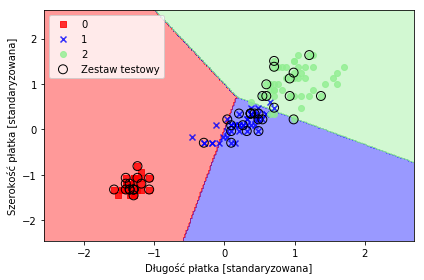

In [12]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('Długość płatka [standaryzowana]')
plt.ylabel('Szerokość płatka [standaryzowana]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

<br>
<br>

# Modelowanie prawdopodobieństwa klasyfikacji za pomocą regresji logistycznej

### Teoretyczne podłoże regresji logistycznej i prawdopodobieństwa warunkowego

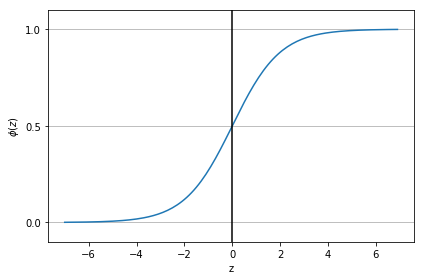

In [26]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# jednostki i siatka osi y
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()

### Wyznaczanie wag logistycznej funkcji kosztu

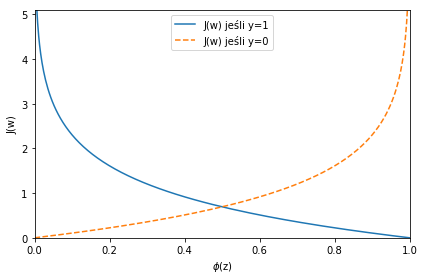

In [27]:
def cost_1(z):
    return - np.log(sigmoid(z))


def cost_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) jeśli y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) jeśli y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### Uczenie modelu regresji logistycznej za pomocą biblioteki scikit-learn

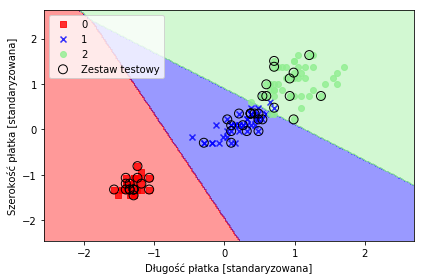

In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('Długość płatka [standaryzowana]')
plt.ylabel('Szerokość płatka [standaryzowana]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [16]:
lr.predict_proba(X_test_std[0,:]
                 .reshape(1, -1))

array([[  2.05743774e-11,   6.31620264e-02,   9.36837974e-01]])

### Zapobieganie nadmiernemu dopasowaniu za pomocą regularyzacji

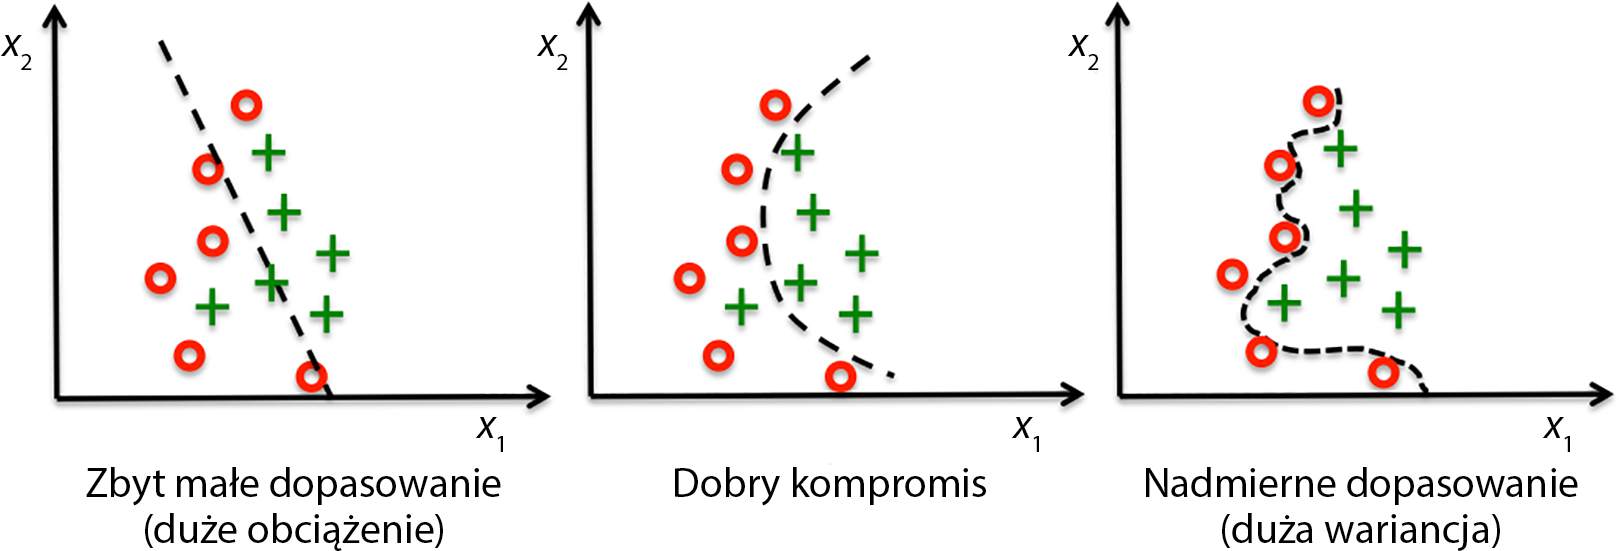

In [17]:
Image(filename='./rysunki/reg.png', width=700) 

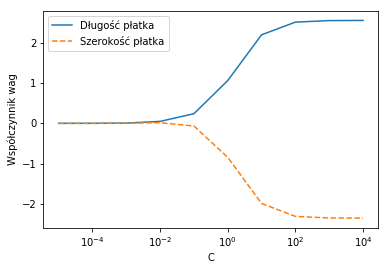

In [18]:
weights, params = [], []
for c in np.arange(-5., 5.):
    lr = LogisticRegression(C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='Długość płatka')
plt.plot(params, weights[:, 1], linestyle='--',
         label='Szerokość płatka')
plt.ylabel('Współczynnik wag')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

# Uczenie drzew decyzyjnych

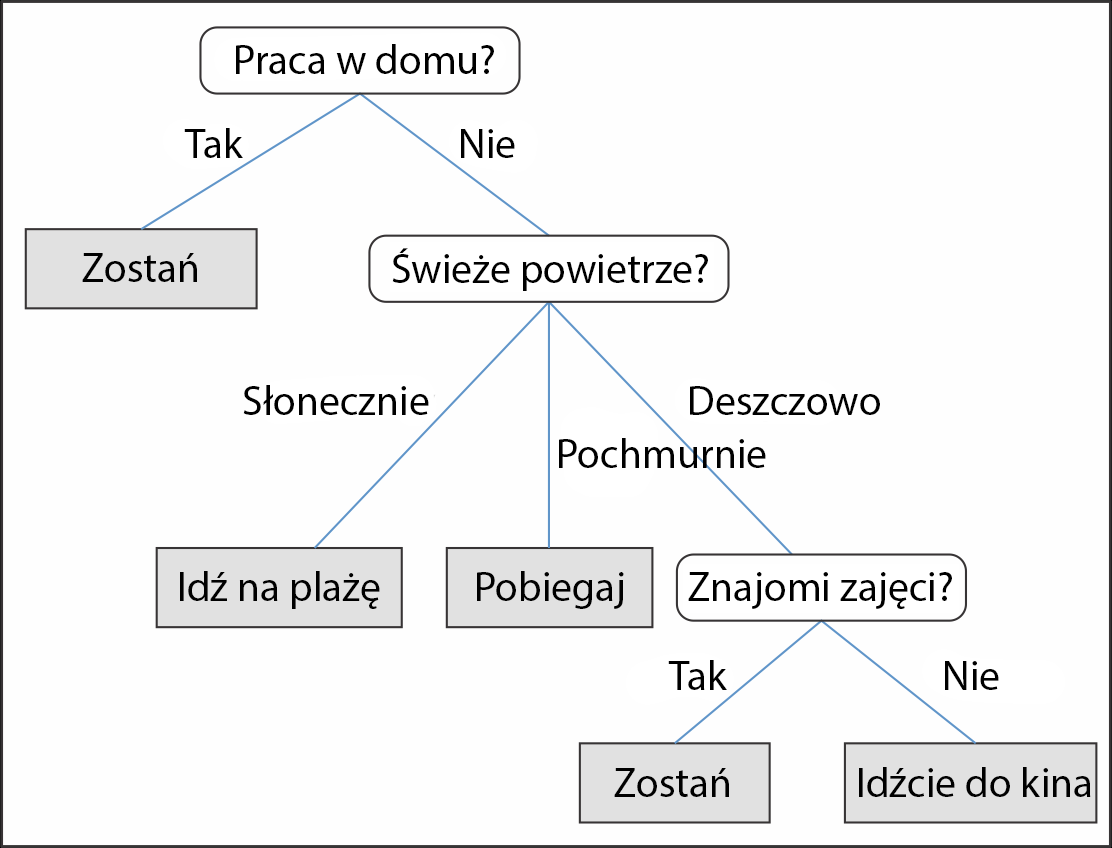

In [19]:
Image(filename='./rysunki/uczenie.png', width=400)

## Maksymalizowanie przyrostu informacji

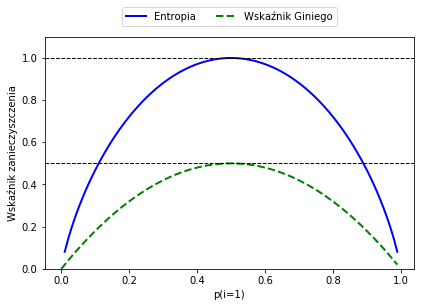

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def gini(p):
    return (p)*(1 - (p)) + (1-p)*(1 - (1-p))
def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, gini(x)], 
                          ['Entropia', 
                           'Wskaźnik Giniego'],
                          ['-', '--'],
                          ['blue', 'green']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=3, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Wskaźnik zanieczyszczenia')
plt.tight_layout()
plt.show()

<br>
<br>

## Budowanie drzewa decyzyjnego

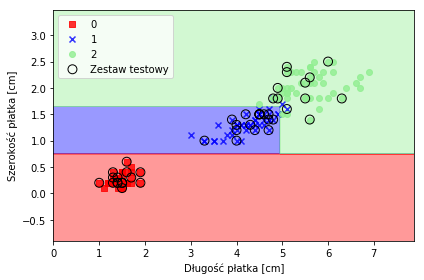

In [21]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree, test_idx=range(105,150))

plt.xlabel('Długość płatka [cm]')
plt.ylabel('Szerokość płatka [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

<br>
<br>

## Łączenie niewydajnych klasyfikatorów w klasyfikatory wydajne za pomocą modelu lasu losowego

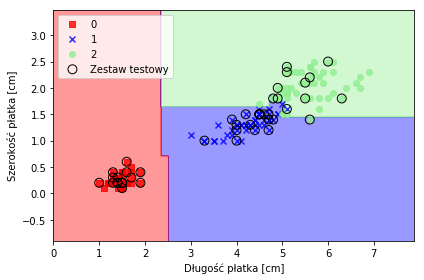

In [22]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=10, 
                                random_state=1
                               )
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined, 
                      classifier=forest, test_idx=range(105,150))

plt.xlabel('Długość płatka [cm]')
plt.ylabel('Szerokość płatka [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

<br>
<br>

# Algorytm k-najbliższych sąsiadów — model leniwego uczenia

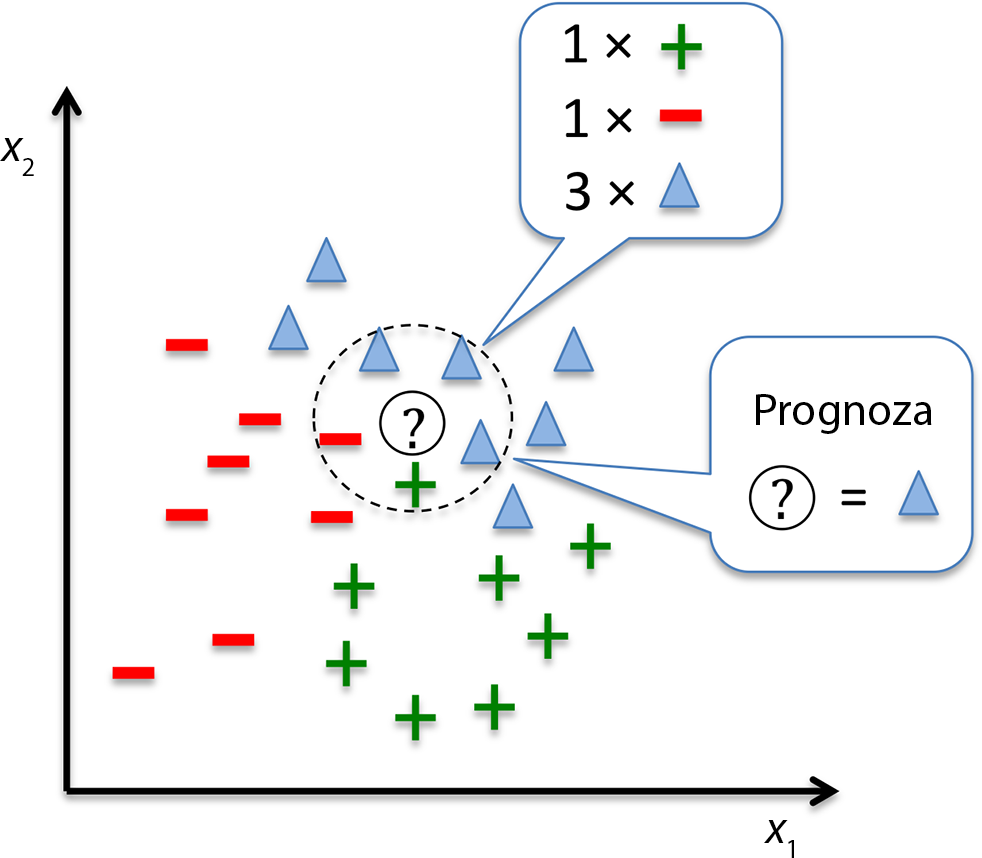

In [23]:
Image(filename='./rysunki/knn.png', width=400) 

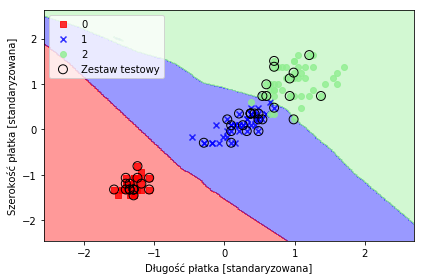

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105,150))

plt.xlabel('Długość płatka [standaryzowana]')
plt.ylabel('Szerokość płatka [standaryzowana]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

<br>
<br>